# Simulating loacl field potentials (LFP) from correlated spike trains

This notebook will first simulate correlated spike trains as doubly stochastic processes (Brette, 2009; homogeneous pool). Next, local field potentials (LFP) will be simulated from the generated spike trains. Critically, this notebook will characterize relationship between the timescale of the stochastic process used to generate the spike trains and the timescale of the resulting LFP.

This notebook will answer the following questions:
	1. What is the relationship between the timescale of the stochastic process and the timescale of the lfp (Prediction: positive linear corr)
	2. How does population size affect the relationships characterized in 1



#### import

In [1]:
import sys
sys.path.append('../../sim_field')
from os.path import join as pjoin
from funcs import sim_lfp_pool
from funcs import sim_homogeneous_pool
from plots import plot_coincidences
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.spectral import plot_power_spectra

#### setting

In [2]:
N_DT_CC = 20000 # number of time bins for cross correlation
DT = 0.1 # time increment in ms
N_NEURONS = 5 # number of neurons

N_SECONDS = 2000
FS = 1000
ALPHA = 300. # I don't know why ALPHA needs to be this high for the functions to work
TAU_C = 1.0E-2
CHUNK_SIZE = 5
FIRING_RATE = 20

## Simulate correlated spiking
simulate correlated spike trains as doubly stochastic processes (Brette, 2009; homogeneous pool)

In [3]:
spikes, rand_process = sim_homogeneous_pool(mu=FIRING_RATE, fs=FS, n_seconds=N_SECONDS, \
                         variance = 300, tau_c=TAU_C)

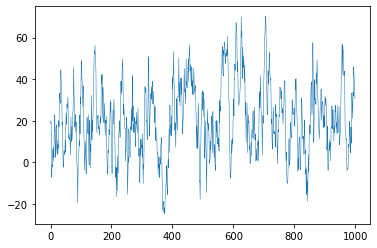

In [4]:
# Plot random process
plt.plot(rand_process[:1000], linewidth=0.5)

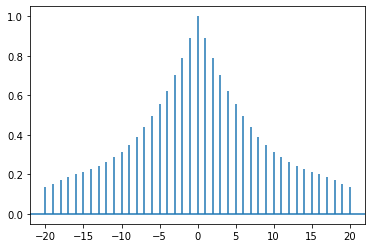

In [5]:
# Plot rate autocorr
rand_process_mean_removed = signal.detrend(rand_process, type='constant')
plt.acorr(rand_process_mean_removed[:5000], maxlags = 20);

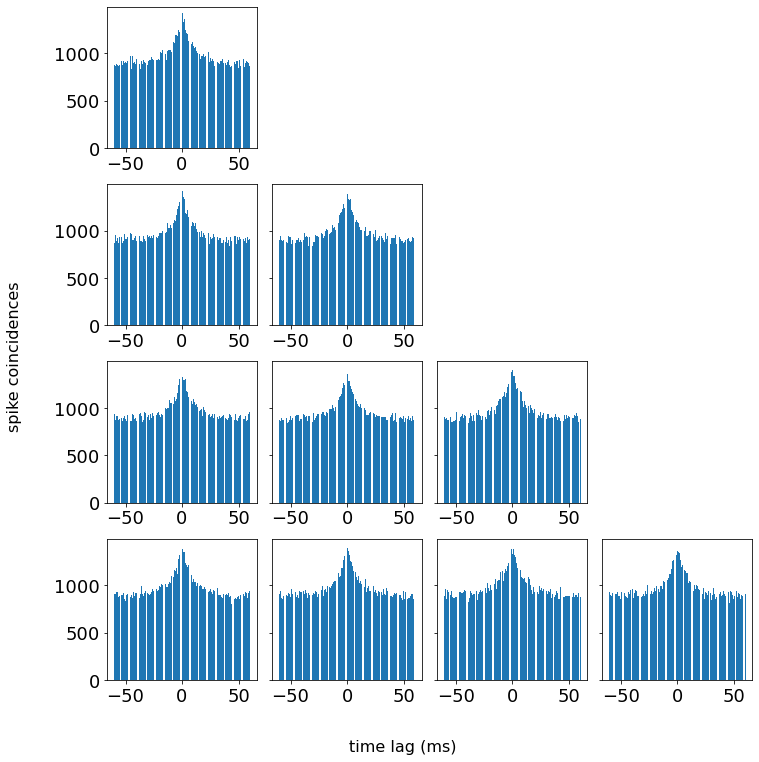

In [6]:
# Plot coincidences
plot_coincidences(spikes, maxlags = int(TAU_C * FS * 2) * 3);

## Simulate LFP
simulate LFP from correlated spike train (Gao, 2017)

In [7]:
lfp, _ = sim_lfp_pool(n_neurons = 100)

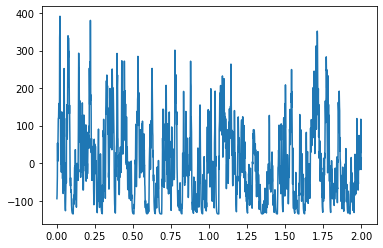

In [8]:
# Plot lfp
t = np.linspace(0,2,2000)
plt.plot(t[:2000], lfp[:2000])

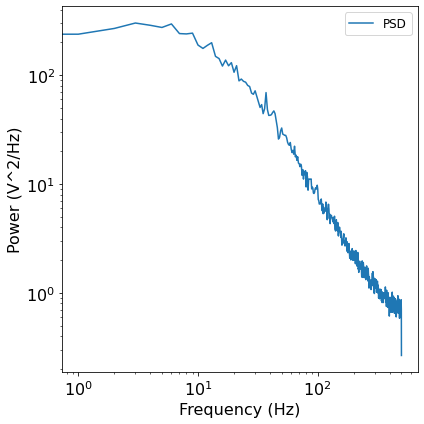

In [9]:
# Plot spectrum
freq, psd = compute_spectrum(lfp, FS, method='welch', avg_type='median',
                                nperseg=FS, noverlap=int(FS/2))
plot_power_spectra([freq], [psd],['PSD'])

## Characterize timescales
Characterize the relationship between the timescale of the stochastic process and the timescale of the lfp

## Evaluate effect of population size